In [29]:
import spharpy
from spharpy.samplings import Coordinates
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colorbar import Colorbar
%matplotlib inline

# Plane Wave Decomposition



The sound pressure at the microphones of a spherical array resulting from a plane wave incident from $(\theta_i, \phi_i)$ may be written as the expansion of spherical harmonic coefficients as

$$ \mathbf{p}(kr) = \mathbf{Y} \mathbf{B}  \mathbf{a}(k, \theta, \phi)$$

with the plane wave density function

$$ \mathbf{a}(k, \theta, \phi) = [{Y_0^0}^*(\theta_i, \phi_i), {Y_1^{-1}}^*(\theta_i, \phi_i), \dots, {Y_N^N}^*(\theta_i, \phi_i)] $$

for the single plane wave with unit amplitude, and the modal strength matrix 

$$ \mathbf{B} = \mathrm{diag}([b_0(kr), b_1(kr), b_1(kr), \dots, b_N(kr)]) $$

representing the type of sphere, which may either be an open sphere (microphones mounted on open frame support) or a rigid sphere.

In [30]:
n_max = 4
kr = np.linspace(0.5, 10, 512)

In [32]:
B_open = spharpy.spherical.modal_strength(n_max, kr, arraytype='open')
B_rigid = spharpy.spherical.modal_strength(n_max, kr, arraytype='rigid')

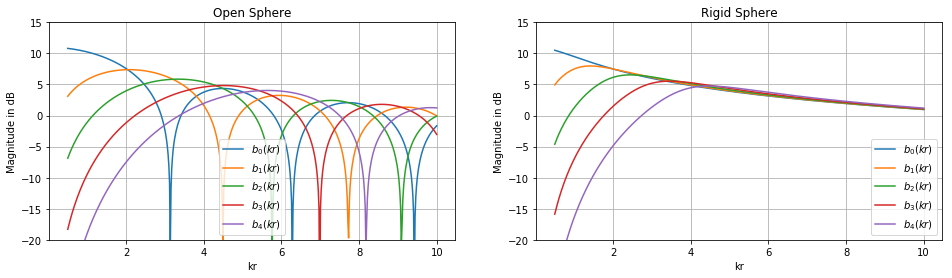

In [33]:
plt.figure(figsize=(16, 4))
ax = plt.subplot(1, 2, 1)
n_max = 4
mask = spharpy.spherical.nm2acn(np.arange(0, n_max+1), np.zeros(n_max+1))
ax.plot(kr, 10*np.log10(np.abs(np.diagonal(B_open, axis1=1, axis2=2)[:, mask])))
plt.grid(True)
ax.set_ylabel('Magnitude in dB')
ax.set_xlabel('kr')
plt.legend(['$b_0(kr)$', '$b_1(kr)$', '$b_2(kr)$', '$b_3(kr)$', '$b_4(kr)$'])
ax.set_title('Open Sphere')
ax.set_ylim((-20, 15))
ax = plt.subplot(1, 2, 2)
mask = spharpy.spherical.nm2acn(np.arange(0, n_max+1), np.zeros(n_max+1))
ax.plot(kr, 10*np.log10(np.abs(np.diagonal(B_rigid, axis1=1, axis2=2)[:, mask])))
plt.grid(True)
ax.set_ylabel('Magnitude in dB')
ax.set_xlabel('kr')
plt.legend(['$b_0(kr)$', '$b_1(kr)$', '$b_2(kr)$', '$b_3(kr)$', '$b_4(kr)$'])
ax.set_title('Rigid Sphere')
ax.set_ylim((-20, 15));

In [38]:
kr = np.array([2.5])
arraytype = 'rigid'
doa_pw = Coordinates(0, 1, 0)
plane_wave_density = spharpy.spherical.spherical_harmonic_basis(n_max, doa_pw)

B = np.squeeze(spharpy.spherical.modal_strength(n_max, kr, arraytype=arraytype))

p_nm = B @ plane_wave_density.T.conj()

sphere = spharpy.samplings.hyperinterpolation(30)
Y_sphere = spharpy.spherical.spherical_harmonic_basis(n_max, sphere)

p_sphere =  np.squeeze(Y_sphere @ p_nm)

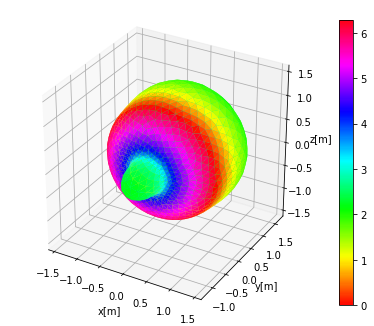

In [39]:
plt.figure(figsize=(7, 7))
spharpy.plot.balloon(sphere, p_sphere)

## Decomposition of the Sound Field

Before the actual plane wave decomposition, the sound pressure recorded at the microphone positions needs to be decomposed into spherical harmonic coefficients using the spherical harmonic transform

$$ \mathbf{p_{nm}} = \mathbf{Y}^+ \mathbf{p}(kr) $$

We can then approximate the plane wave density function using the matrix vector product

$$ \mathbf{a}(k) = \frac{4\pi}{(N+1)^2}\mathbf{Y_s}^H \mathbf{B}^{-1} \mathbf{p_{nm}}$$

with the steering matrix $ \mathbf{Y_s} $

In [42]:
steering_directions = spharpy.samplings.gaussian(30)
Y_steering = spharpy.spherical.spherical_harmonic_basis(n_max, steering_directions)
plane_wave_density = 4*np.pi/(n_max+1)**2 * np.squeeze(np.real(Y_steering @ np.linalg.pinv(B) @ p_nm))

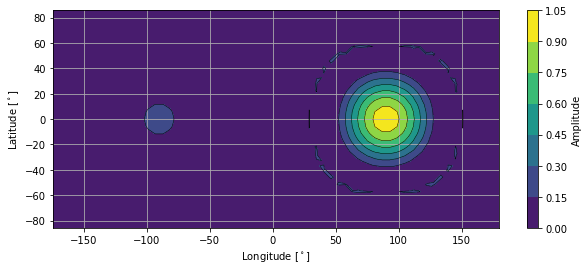

In [43]:
plt.figure(figsize=(10, 4))
spharpy.plot.contour(steering_directions, np.abs(plane_wave_density))